In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

<Axes: >

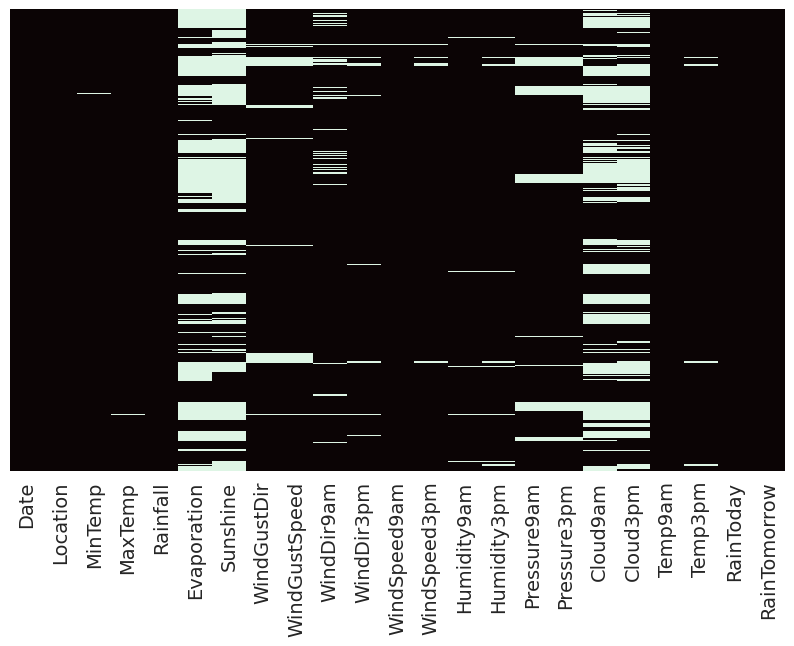

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
###########################################  median

# for column in df.columns:
#     if df[column].dtype == 'object':
#         df[column].fillna(df[column].mode()[0], inplace=True)
#     else:
#         df[column].fillna(df[column].median(), inplace=True)

In [ ]:
###########################################  knn

# from sklearn.impute import KNNImputer

# def KNNImpute(df):
#     # Extract numerical columns for kNN imputation
#     numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#     # Initialize KNNImputer
#     imputer = KNNImputer(n_neighbors=3)

#     # Perform kNN imputation on numeric columns
#     df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


#     return df

# # Apply the KNNImpute function to a copy of the DataFrame
# df = KNNImpute(df.copy())

In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(df, x='Location', title='Location vs. Rainy Days', color='RainToday')

### Majority of the data from all the location shows that there is no rain today.

In [ ]:
px.histogram(df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

### No rain today and tomorrow are higher in number

In [ ]:
px.scatter(df.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

In [ ]:
px.scatter(df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

<ipython-input-42-b52ef202b5d3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



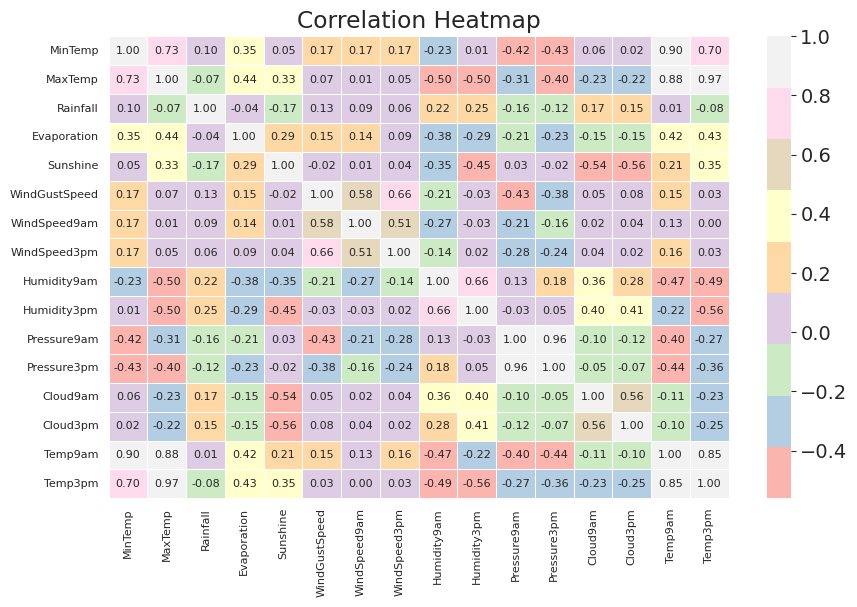

In [ ]:
correlation_matrix = df.corr()

annot_kws = {"size": 8}

sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f", linewidths=0.5, annot_kws=annot_kws)


# Reduce the size of x-axis and y-axis tick labels
plt.xticks(size=8)
plt.yticks(size=8)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

## Here we are dropping
## 'Date','Pressure3pm', 'Pressure9am','Rainfall','WindSpeed9am','WindSpeed3pm'
## as they have very less correlation with all the other columns



In [ ]:
columns_to_drop = ['Date','Pressure3pm', 'Pressure9am','Rainfall','WindSpeed9am','WindSpeed3pm']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
height_value = 5
sns.pairplot(df,height=height_value)
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['Location','WindGustDir','WindDir9am','WindDir3pm'], drop_first = True)
df.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,5.472516,7.63054,44.0,71.0,22.0,8.000000,4.49925,16.9,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,5.472516,7.63054,44.0,44.0,25.0,4.431161,4.49925,17.2,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,5.472516,7.63054,46.0,38.0,30.0,4.431161,2.00000,21.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,5.472516,7.63054,24.0,45.0,16.0,4.431161,4.49925,18.1,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,5.472516,7.63054,41.0,82.0,33.0,7.000000,8.00000,17.8,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(140787, 106)

In [ ]:
numeric_columns = df.select_dtypes(include=['float64']).columns

scaler = StandardScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [ ]:
LE = LabelEncoder()
df['RainToday'] = LE.fit_transform(df['RainToday'])
df['RainTomorrow'] = LE.fit_transform(df['RainTomorrow'])

In [ ]:
unique_values_counts = df['RainTomorrow'].value_counts()

print("Unique values counts in 'RainTomorrow' column:")
print(unique_values_counts)


Unique values counts in 'RainTomorrow' column:
0    109586
1     31201
Name: RainTomorrow, dtype: int64


In [ ]:
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
x.shape

(140787, 105)

In [ ]:
y.shape

(140787,)

In [ ]:
unique_values = np.unique(y)

# Print the unique values
print("Unique values in the column:", unique_values)

Unique values in the column: [0 1]


In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic imbalanced dataset for demonstration
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.99, 0.01],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import StratifiedKFold

# Assuming 'X' and 'y' are your features and target variable
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

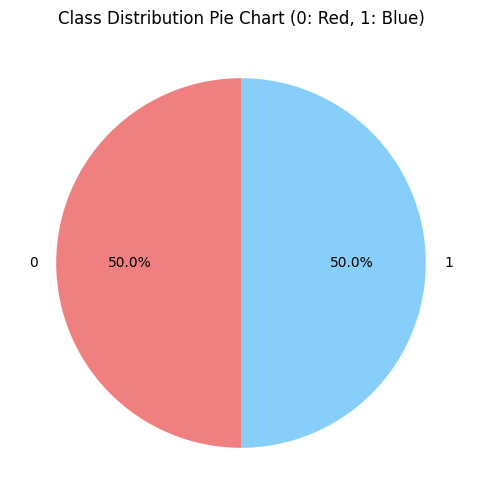

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_resampled is a NumPy array
unique_values, counts = np.unique(y_train, return_counts=True)

# Plotting a pie chart with different colors for 0 and 1
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=unique_values, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Class Distribution Pie Chart (0: Red, 1: Blue)')
plt.show()

In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2 , random_state=0)
print('x_train', X_train.shape)
print('x_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (1584, 20)
x_test (200, 20)
y_train (1584,)
y_test (200,)


In [ ]:
unique_values = np.unique(y_test)

# Print the unique values
print("Unique values in the column:", unique_values)

Unique values in the column: [0 1]


In [ ]:
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)
y_pred_logr = logr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
accuracy_logr = accuracy_score(y_test, y_pred_logr)
print("Accuracy score is: ",accuracy_logr)
accuracy = accuracy_score(y_test, y_pred_logr)
conf_matrix = confusion_matrix(y_test, y_pred_logr)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred_logr)
print("Classification Report:")
print(class_report)

Accuracy score is:  1.0
Accuracy: 1.0
Confusion Matrix:
[[198   0]
 [  0   2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00         2

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



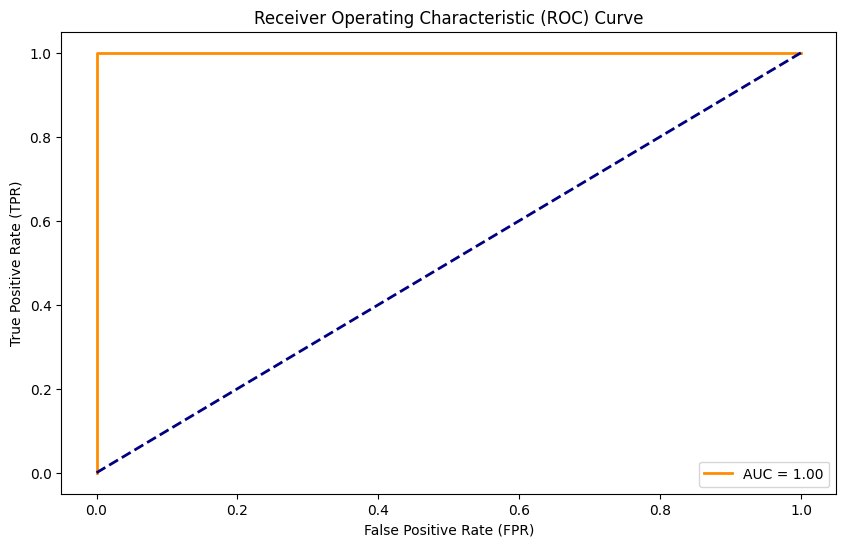

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.verbose = verbose
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.initialize_parameters(num_features)

        for iteration in range(self.num_iterations):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)

            # Compute gradients
            dz = predictions - y
            dw = np.dot(X.T, dz) / num_samples
            db = np.sum(dz) / num_samples

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print loss for every 100 iterations
            if self.verbose and iteration % 100 == 0:
                loss = -(1/num_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
                # print(f"Iteration {iteration}, Loss: {loss}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return np.round(predictions)

logistic_reg_model = LogisticRegressionCustom(learning_rate=0.01, num_iterations=1000, verbose=True)
logistic_reg_model.fit(X_train, y_train)
y_pred = logistic_reg_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
accuracy_logr = accuracy_score(y_test, y_pred)
print("Accuracy score is: ",accuracy_logr)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy score is:  1.0
Accuracy: 1.0
Confusion Matrix:
[[198   0]
 [  0   2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00         2

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



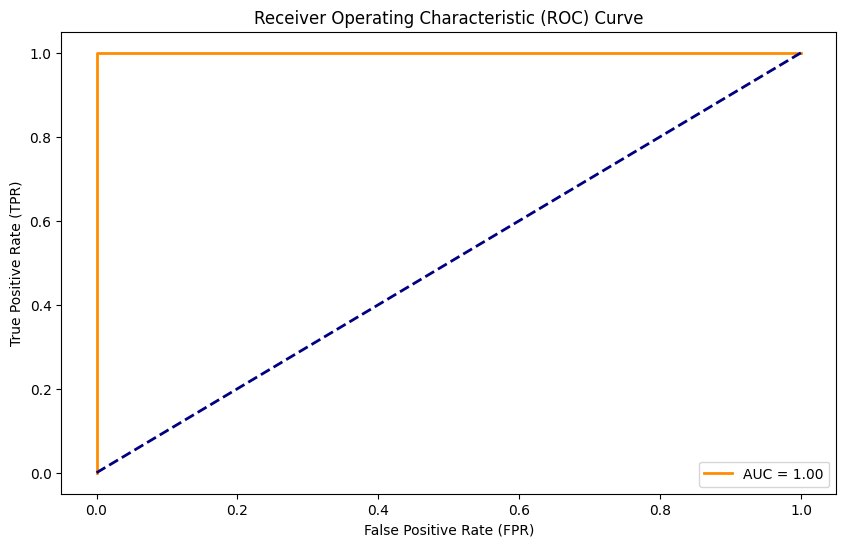

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()